# Import Packages

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load in Data

## Basic Stats 

In [2]:
bs89 = pd.read_csv('basic_stats_18_19.csv', index_col = 0)

In [3]:
bs89.columns

Index(['Player', 'Age', 'Tm', 'Pos', 'GP', 'G', 'A', 'PTS▼', '+/-', 'PIM',
       'PS', 'EV', 'PP', 'SH', 'GW', 'EV.1', 'PP.1', 'SH.1', 'S', 'S%', 'TOI',
       'ATOI', 'BLK', 'HIT', 'FOW', 'FOL', 'FO%'],
      dtype='object')

In [4]:
bs89.drop(['PS'], axis = 1, inplace = True)

In [5]:
bs89.rename(columns = {'PTS▼': 'PTS', 'EV': 'EVP', 'PP': 'PPP', 'SH': 'SHP', 'EV.1': 'EVA', 'PP.1': 'PPA', 'SH.1': 'SHA'}, inplace = True)

## Advanced Stats 

In [6]:
as89 = pd.read_csv('advanced_stats_18_19.csv', index_col = 0)

In [7]:
as89.head()

,Player,Age,Tm,Pos,GP▼,CF,CA,CF%,CF% rel,FF,...,PDO,oZS%,dZS%,TOI/60,TOI(EV),TK,GV,E+/-,SAtt.,Thru%
Rk,,,,,,,,,,,,,,,,,,,,,
1,Marcus Pettersson\pettema01,22,TOT,D,84,1205,1190,50.3,3.5,889,...,101.8,49.9,50.1,16:41,14:56,24,43,5.5,221,39.4
2,Kevin Fiala\fialake01,22,TOT,LW,83,1165,1044,52.7,0.9,888,...,96.4,63.6,36.4,15:38,13:24,44,68,-3.2,316,55.1
3,Ryan Hartman\hartmry01,24,TOT,RW,83,973,952,50.5,-1.3,712,...,100.3,44.5,55.5,13:07,12:23,35,38,-7.7,245,59.2
4,Sebastian Aho\ahose01,21,CAR,C,82,1556,1164,57.2,3.4,1191,...,100.7,59.2,40.8,20:09,16:03,81,64,21.7,466,52.1
5,Josh Anderson\anderjo05,24,CBJ,RW,82,1129,1136,49.8,-0.4,854,...,103.9,46.4,53.6,17:01,14:19,46,19,5.3,383,60.1


In [8]:
as89.columns

Index(['Player', 'Age', 'Tm', 'Pos', 'GP▼', 'CF', 'CA', 'CF%', 'CF% rel', 'FF',
       'FA', 'FF%', 'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%',
       'TOI/60', 'TOI(EV)', 'TK', 'GV', 'E+/-', 'SAtt.', 'Thru%'],
      dtype='object')

In [9]:
as89.drop(['Age', 'Tm', 'Pos', 'GP▼', 'CF% rel'], axis = 1, inplace = True)

## Time On Ice Stats 

In [10]:
toi89 = pd.read_csv('TOI_18_19.csv', index_col = 0)

In [11]:
toi89.columns

Index(['Player', 'Tm', 'Pos', 'Shift', 'GP▼', 'Unnamed: 6', 'TOI', 'CF% Rel',
       'GF/60', 'GA/60', 'Unnamed: 11', 'TOI.1', 'CF% Rel.1', 'GF/60.1',
       'GA/60.1', 'Unnamed: 16', 'TOI.2', 'CF% Rel.2', 'GF/60.2', 'GA/60.2'],
      dtype='object')

In [12]:
toi89.drop(['Tm', 'Pos', 'GP▼', 'Unnamed: 6', 'Unnamed: 11', 'Unnamed: 16'], axis = 1, inplace = True)

In [13]:
toi89.rename(columns = {'TOI': 'EV_TOI', 'CF% Rel': 'EV_CF%_Rel', 
                        'GF/60': 'EV_GFP60', 'GA/60': 'EV_GAP60', 
                        'TOI.1': 'PP_TOI', 'CF% Rel.1': 'PP_CF%_Rel',
                        'GF/60.1': 'PP_GFP60', 'GA/60.1': 'PP_GAP60',
                        'TOI.2': 'SH_TOI', 'CF% Rel.2': 'SH_CF%_Rel',
                        'GF/60.2': 'SH_GFP60', 'GA/60.2': 'SH_GAP60'}, inplace = True)

## Misc Stats

In [14]:
misc89 = pd.read_csv('misc_18_19.csv', index_col = 0)

In [15]:
misc89.columns

Index(['Player', 'Age', 'Tm', 'Pos', 'GP▼', 'GC', 'G', 'A', 'PTS', 'GC.1',
       'PIM', 'S', 'G.1', 'A.1', 'PTS.1', 'GC.2', 'TGF', 'PGF', 'TGA', 'PGA',
       '+/-', 'xGF', 'xGA', 'E+/-', 'OPS', 'DPS', 'PS', 'Att.', 'Made', 'Miss',
       'Pct.'],
      dtype='object')

In [16]:
misc89.drop(['Age', 'Tm', 'Pos', 'GP▼', '+/-', 'E+/-', 'Att.', 'Made', 'Miss', 'Pct.'], axis = 1, inplace = True)

In [17]:
misc89.rename(columns = {'G': 'GPG', 'A': 'APG', 'PTS': 'PTSPG', 'GC.1': 'GCPG', 'PIM': 'PIMPG', 'S': 'SPG', 
                         'G.1': 'AG', 'A.1': 'AA', 'PTS.1': 'APTS', 'GC.2': 'AGC'}, inplace = True)

# Merge DataFrames

In [18]:
df1 = pd.merge(bs89, as89, on = ['Player'])

In [19]:
df2 = pd.merge(df1, toi89, on = ['Player'])

In [20]:
df = pd.merge(df2, misc89, on = ['Player'])

In [21]:
df.head()

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,...,AGC,TGF,PGF,TGA,PGA,xGF,xGA,OPS,DPS,PS
0,Nikita Kucherov\kucheni01,25,TBL,RW,82,41,87,128,24,62,...,46,155,60,71,1,71.5,62.9,12.3,2.3,14.6
1,Connor McDavid\mcdavco01,22,EDM,C,78,41,75,116,3,20,...,43,142,42,107,10,73.7,71.7,10.8,2.1,13.0
2,Patrick Kane\kanepa01,30,CHI,RW,81,44,66,110,2,22,...,43,142,42,98,0,68.6,83.3,10.2,1.6,11.8
3,Leon Draisaitl\draisle01,23,EDM,C,82,50,55,105,2,52,...,43,141,44,109,14,69.1,71.0,10.4,2.2,12.6
4,Sidney Crosby\crosbsi01,31,PIT,C,79,35,65,100,18,36,...,37,139,43,83,5,71.1,52.6,8.9,2.4,11.4


# Clean DataFrame

In [22]:
df.drop(['Age', 'Tm'], axis = 1, inplace = True)

In [23]:
df.columns

Index(['Player', 'Pos', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'EVP', 'PPP',
       'SHP', 'GW', 'EVA', 'PPA', 'SHA', 'S', 'S%', 'TOI', 'ATOI', 'BLK',
       'HIT', 'FOW', 'FOL', 'FO%', 'CF', 'CA', 'CF%', 'FF', 'FA', 'FF%',
       'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%', 'TOI/60', 'TOI(EV)',
       'TK', 'GV', 'E+/-', 'SAtt.', 'Thru%', 'Shift', 'EV_TOI', 'EV_CF%_Rel',
       'EV_GFP60', 'EV_GAP60', 'PP_TOI', 'PP_CF%_Rel', 'PP_GFP60', 'PP_GAP60',
       'SH_TOI', 'SH_CF%_Rel', 'SH_GFP60', 'SH_GAP60', 'GC', 'GPG', 'APG',
       'PTSPG', 'GCPG', 'PIMPG', 'SPG', 'AG', 'AA', 'APTS', 'AGC', 'TGF',
       'PGF', 'TGA', 'PGA', 'xGF', 'xGA', 'OPS', 'DPS', 'PS'],
      dtype='object')

In [24]:
def clean_player_name(row):
    return row.split('\\')[0]

In [25]:
df['Player'] = df['Player'].apply(lambda x: clean_player_name(x))

# EDA

In [26]:
df['GP'].describe()

count    906.000000
mean      50.502208
std       28.743685
min        1.000000
25%       23.000000
50%       60.000000
75%       78.000000
max       84.000000
Name: GP, dtype: float64

In [27]:
df['ATOI'].head()

0    19:58
1    22:50
2    22:29
3    22:35
4    21:00
Name: ATOI, dtype: object

In [28]:
def convert_ATOI_to_min(row):
    r = row.split(':')
    return int(r[1]) + 60*int(r[0])

In [29]:
df['ATOI'] = df['ATOI'].apply(lambda row: convert_ATOI_to_min(row))

In [32]:
df['ATOI'].describe()

count     906.000000
mean      902.444812
std       260.391108
min       112.000000
25%       716.250000
50%       892.500000
75%      1090.500000
max      1602.000000
Name: ATOI, dtype: float64

In [35]:
df = df.loc[(df['ATOI'] >= 716.25) & (df['GP'] >= 23)]

In [36]:
df.shape

(579, 76)

In [37]:
df['TTOI'] = df['ATOI'] * df['GP']

In [39]:
df.columns

Index(['Player', 'Pos', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'EVP', 'PPP',
       'SHP', 'GW', 'EVA', 'PPA', 'SHA', 'S', 'S%', 'TOI', 'ATOI', 'BLK',
       'HIT', 'FOW', 'FOL', 'FO%', 'CF', 'CA', 'CF%', 'FF', 'FA', 'FF%',
       'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%', 'TOI/60', 'TOI(EV)',
       'TK', 'GV', 'E+/-', 'SAtt.', 'Thru%', 'Shift', 'EV_TOI', 'EV_CF%_Rel',
       'EV_GFP60', 'EV_GAP60', 'PP_TOI', 'PP_CF%_Rel', 'PP_GFP60', 'PP_GAP60',
       'SH_TOI', 'SH_CF%_Rel', 'SH_GFP60', 'SH_GAP60', 'GC', 'GPG', 'APG',
       'PTSPG', 'GCPG', 'PIMPG', 'SPG', 'AG', 'AA', 'APTS', 'AGC', 'TGF',
       'PGF', 'TGA', 'PGA', 'xGF', 'xGA', 'OPS', 'DPS', 'PS', 'TTOI'],
      dtype='object')

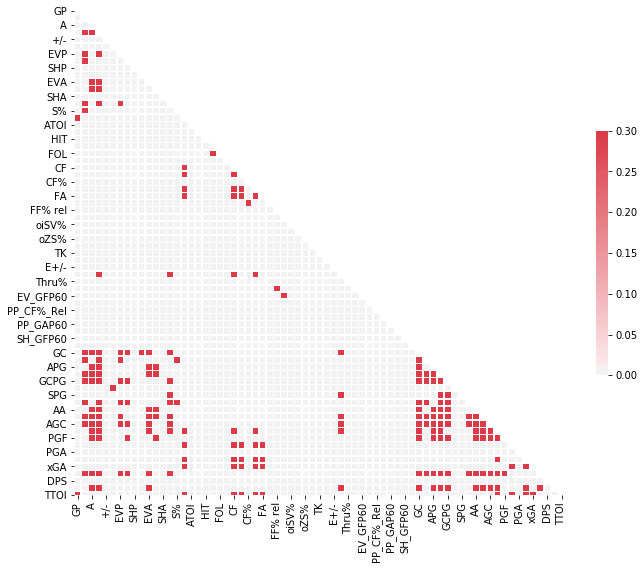

In [48]:
# Compute the correlation matrix
corr = df.corr()>.8

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})